In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
homophily_df = pd.read_csv("../Results/homophily_results.csv")
homophily_df['simplicial_score_2'] = homophily_df['dyadic_score'] 
homophily_df['hypergraph_score_2'] = homophily_df['dyadic_score']

In [3]:
plot_arr = []
x = [i for i in range(2, 8 + 1)]
for dataset in homophily_df['dataset']:
    for k in x:
        plot_arr.append({
            'dataset': dataset,
            'group_size': k,
            'simplicial_score': homophily_df.set_index('dataset').loc[dataset, f'simplicial_score_{k}'],
            'hypergraph_score': homophily_df.set_index('dataset').loc[dataset, f'hypergraph_score_{k}'],
        })

In [4]:
plot_df = pd.DataFrame(plot_arr)
plot_df = plot_df[plot_df['group_size'] <= 5]

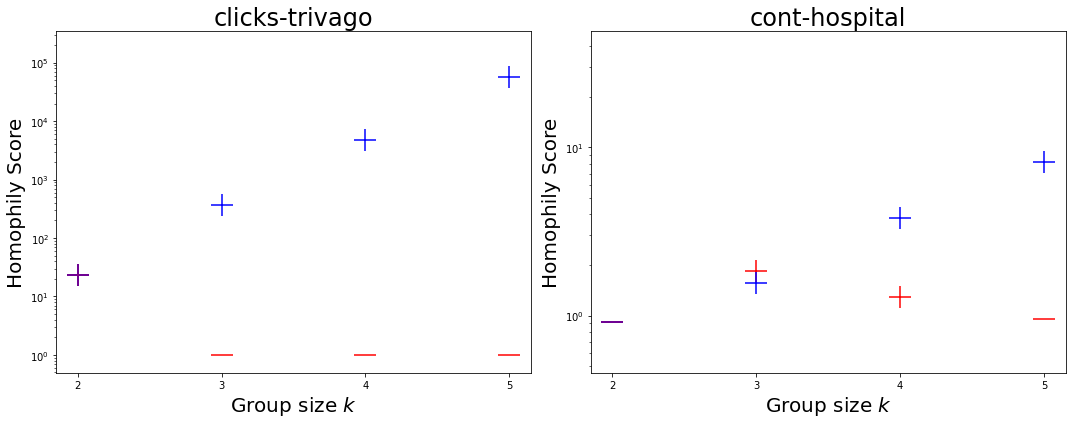

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, dataset in enumerate(['clicks-trivago', 'cont-hospital']):
    x = plot_df.loc[plot_df['dataset'] == dataset, 'group_size']

    s = 500
    simplicial = plot_df.loc[plot_df['dataset'] == dataset, 'simplicial_score']
    hypergraph = plot_df.loc[plot_df['dataset'] == dataset, 'hypergraph_score']

    err = 0.0000
    axs[i].scatter(x[simplicial < 1 - err], simplicial[simplicial < 1 - err], c='red', marker="_", s=s, 
               label='Simplicial Score (< 1)')
    axs[i].scatter(x[simplicial > 1 + err], simplicial[simplicial > 1 + err], c='red', marker="+", s=s, 
               label='Simplicial Score (> 1)')
    axs[i].scatter(x[(simplicial >= 1 - err) & (simplicial <= 1 + err)], 
               simplicial[(simplicial >= 1 - err) & (simplicial <= 1 + err)], 
               c='red', marker="o", s=s/20, 
               label='Simplicial Score (= 1)')

    axs[i].scatter(x[hypergraph < 1], hypergraph[hypergraph < 1], c='blue', marker="_", s=s, 
               label='Hypergraph Score (< 1)')
    axs[i].scatter(x[hypergraph > 1], hypergraph[hypergraph > 1], c='blue', marker="+", s=s, 
               label='Hypergraph Score (> 1)')
    axs[i].scatter(x[(hypergraph >= 1 - err) & (hypergraph <= 1 + err)], 
               hypergraph[(hypergraph >= 1 - err) & (hypergraph <= 1 + err)], 
               c='blue', marker="o", s=s/20, 
               label='Hypergraph Score (= 1)')
    
    axs[i].scatter(x.iloc[0], simplicial.iloc[0], color='purple', 
                   marker=("+" if simplicial.iloc[0] > 1 else "_"), s=s)
    axs[i].set_xlabel("Group size $k$", fontsize=20)
    axs[i].set_ylabel("Homophily Score", fontsize=20)
    axs[i].set_ylim([0.5*min(simplicial), 6*max(hypergraph)])
    axs[i].set_xticks(x)
    axs[i].semilogy()
    axs[i].set_title(dataset, fontsize=24)
    
fig.tight_layout()
# plt.savefig("homophily_groupsize.eps", format='eps')